# Intro to `jeepr` with USRadar data

`jeepr` is a set of utilities for handling GPR data, especially `gprMax` models and synthetics, and real data from USRadar instruments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import jeepr
jeepr.__version__

'0.1.2'

## Make `Scan` from a USRadar RAD file

In [3]:
from jeepr import Scan

In [4]:
s = Scan.from_rad('../tests/Multi-01_LINE00A.RA1')

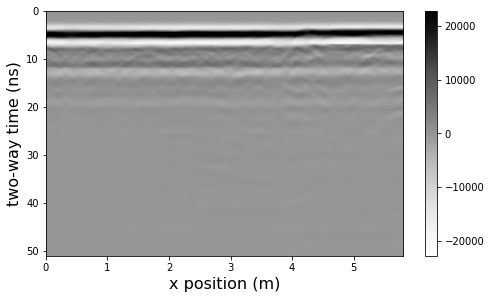

In [5]:
s.plot()

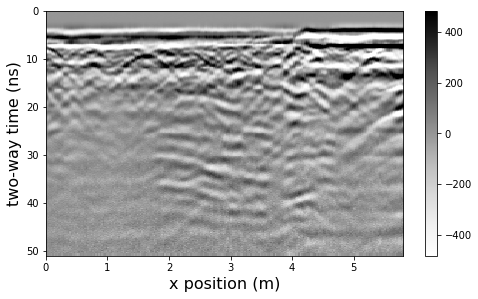

In [6]:
s.demean().gain().plot()

In [7]:
s.log

['loaded from rad']

In [8]:
s_ = s.resample(100e-12)

In [9]:
s_.log

['loaded from rad', 'resampled 2e-10 s to 1e-10 s']

In [10]:
s.time[:9]

array([  0.00000000e+00,   2.00000000e-10,   4.00000000e-10,
         6.00000000e-10,   8.00000000e-10,   1.00000000e-09,
         1.20000000e-09,   1.40000000e-09,   1.60000000e-09])

In [11]:
s.meta

{'ACQUISITION_DATE': '03/02/17',
 'ACQUISITION_TIME': '10:30:31',
 'ANTENNA_TYPE': '3',
 'ANTENNA_TYPE_DETECTED': 'eQUANTUM',
 'GPS_TYPE': 'INTERNAL',
 'MIGRATION_TYPE': 'NONE',
 'NOTE': 'Ver:5.1.1134_Machine:4af33599664f73c57b04',
 'OBSERVER': '',
 'RADAR_HEAD_MARK': '3',
 'SPR_CHANNELS_TOTAL': '3',
 'SPR_CHANNEL_NUM': '1',
 'SPR_FILE_VERSION': '7',
 'SPR_INTERVAL_MARKER': '1',
 'SPR_LINE_COUNT': '1',
 'SPR_LINE_SEPARATION': '1',
 'SPR_MEDIUM_DIELECTRIC': '08.95',
 'SPR_NO_AVERAGES': 'AVG_4',
 'SPR_SAMPLES_PER_SCAN': '256',
 'SPR_SAMPLING_INTERVAL': '200',
 'SPR_SHAFT_INTERVAL': '0.025',
 'SPR_SW_AVERAGES': '32',
 'SPR_TIMER_FREQUENCY': '10',
 'SPR_TRIGGER_MODE': 'SHAFT',
 'TRACE_SORT': 'COMMON_OFFSET',
 'TVG_SLOPE': '15',
 'TVG_START_GAIN': '3',
 'UNITS': 'METERS'}

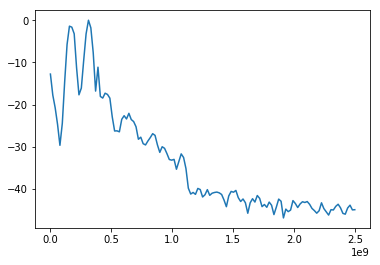

In [12]:
f, p = s.get_spectrum()

plt.plot(f, p)

In [13]:
t0 = np.argmax(s.mean(axis=-1))

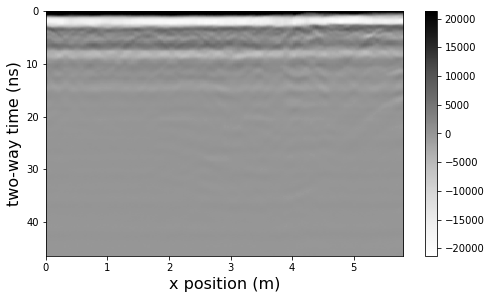

In [14]:
u = s.crop(idx=t0)

u.plot()